In [1]:
# pip install citipy

     |████████████████████████████████| 557 kB 4.9 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=2e941fb5387fae8e8a2ba831c4751387ebbcf31657c29d3ff224fce02d0fae2a
  Stored in directory: /Users/petertran/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# documentation: https://openweathermap.org/current

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

In [2]:
# api.openweathermap.org/data/2.5/box/city?bbox={bbox}&appid={API key}
base_url = "http://api.openweathermap.org/data/2.5/box/city?"
bbox = [-90,-180,90,180]
query = f"bbox=-90,-180,90,180,10&appid={api_key}"
query_url = base_url + query
query_url

'http://api.openweathermap.org/data/2.5/box/city?bbox=-90,-180,90,180,10&appid=4ab50a943ddb66ae940d3dfa7c26d8fb'

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [32]:
city_name = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind_speed = []
country = []
date = []
for city in cities:
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = f"q={city}&appid={api_key}&units=imperial"
    query_url = base_url + query
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        print(weather_json["name"]) 
        
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        hum.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
    except KeyError:
        print("City not found. Skipping...")
    
    
# weather_json

San Quintín
East London
Pangnirtung
Ushuaia
City not found. Skipping...
Hobart
Lüderitz
Mar del Plata
Gambēla
Mount Gambier
Saint Paul Harbor
Sakakah
Río Gallegos
Esperance
Huilong
Poum
Tiksi
Hermanus
Qaanaaq
Rawson
Puerto Ayora
Bonavista
João Câmara
Isangel
Upernavik
Chokurdakh
Hilo
Nemuro
Kaitangata
Coyhaique
Tura
Ilo
Giohar
Laas
Korla
Glomfjord
Praia da Vitória
Cape Town
Goderich
Port Elizabeth
Saint-Pierre
Araouane
Lagoa
Jamestown
Villa Bisonó
Olbia
Honiara
Rikitea
Bluff
City not found. Skipping...
New Norfolk
City not found. Skipping...
Mataura
Barrow
Saint George
Changji
Nador
Saskylakh
Wana
Smithers
Provideniya
Khvorostyanka
Ziarat
Copiapó
Bathsheba
Grindavik
Katsuura
Auki
Saldanha
Zhangye
Eureka
Morondava
Punta Arenas
Barra
Kaduqli
City not found. Skipping...
Bani Walid
Avarua
Broome
Dilla
City not found. Skipping...
Manakara
Galle
West Wendover
Busselton
Muisne
Atuona
Montería
Jatiroto
City not found. Skipping...
Hervey Bay
City not found. Skipping...
Vostok
Dudinka
Vaini
Beng

In [34]:
# Export the city data into a .csv.
# Display the DataFrame

cities_data_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
cities_data_df.to_csv(output_data_file, index=False, header=True)
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,60.08,80,57,10.63,MX,1612410922
1,East London,-33.0153,27.9116,69.80,88,20,8.05,ZA,1612410923
2,Pangnirtung,66.1451,-65.7125,-9.94,78,80,1.83,CA,1612410923
3,Ushuaia,-54.8000,-68.3000,48.20,87,75,6.91,AR,1612410763
4,Hobart,-42.8794,147.3294,78.01,53,40,8.05,AU,1612410923


In [35]:
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,18.477199,19.615462,51.321107,73.705281,48.635434,8.369097,1.612411e+09
std,32.970807,89.093853,30.906730,19.517473,40.110513,6.064452,6.238259e+01
min,-54.800000,-179.166700,-41.800000,1.000000,0.000000,0.090000,1.612411e+09
25%,-7.259150,-56.969450,33.900000,64.000000,1.000000,3.500000,1.612411e+09
50%,20.700000,22.401000,61.920000,79.000000,42.000000,6.910000,1.612411e+09
75%,45.872700,98.345400,75.350000,88.000000,90.000000,11.500000,1.612411e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,33.460000,1.612411e+09


In [36]:
# Inspect the data and remove the cities where the humidity > 100%.
#  Get the indices of cities that have humidity over 100%.
# Int64Index([], dtype='int64')

In [37]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [38]:
# Plotting the Data

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

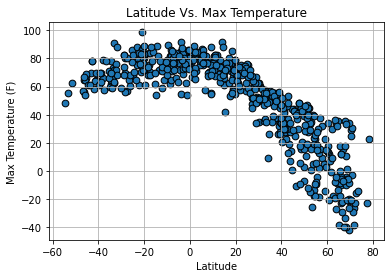

In [62]:
# Latitude vs. Temperature Plot

lat_temp_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, 
            title="Latitude Vs. Max Temperature", facecolors="blue", edgecolors="black", s=45)
lat_temp_scatter.set(xlabel="Latitude", ylabel="Max Temperature (F)")
plt.savefig("../Images/lat_vs_temp_scatter")
plt.show()


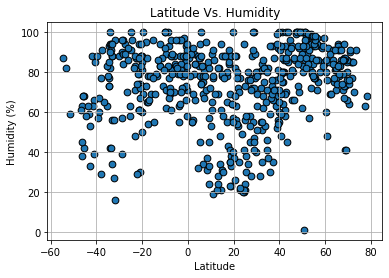

In [100]:
# Latitude vs. Humidity Plot

lat_hum_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, 
            title="Latitude Vs. Humidity", facecolors="blue", edgecolors="black", s=45)
lat_hum_scatter.set(xlabel="Latitude", ylabel="Humidity (%)")
plt.savefig("../Images/lat_vs_hum_scatter")
plt.show()

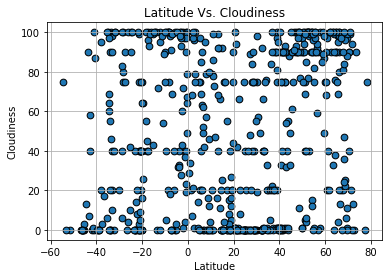

In [70]:
#  Latitude vs. Cloudiness Plot

lat_cloud_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, 
            title="Latitude Vs. Cloudiness", facecolors="blue", edgecolors="black", s=45)
lat_cloud_scatter.set(xlabel="Latitude", ylabel="Cloudiness")
plt.savefig("../Images/lat_vs_cloudiness_scatter")
plt.show()

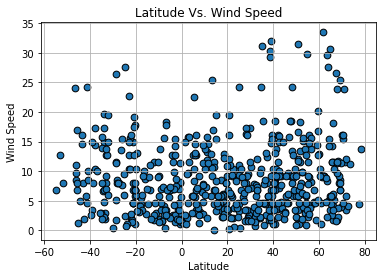

In [71]:
# Latitude vs. Wind Speed Plot

lat_wind_scatter = cities_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, 
            title="Latitude Vs. Wind Speed", facecolors="blue", edgecolors="black", s=45)
lat_wind_scatter.set(xlabel="Latitude", ylabel="Wind Speed")
plt.savefig("../Images/lat_vs_windspeed_scatter")
plt.show()

In [72]:
#  Linear Regression

In [75]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

north_hemi = cities_data_df.loc[cities_data_df["Lat"]>0]
north_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Quintín,30.4833,-115.9500,60.08,80,57,10.63,MX,1612410922
2,Pangnirtung,66.1451,-65.7125,-9.94,78,80,1.83,CA,1612410923
7,Gambēla,8.2500,34.5833,77.94,37,0,3.15,ET,1612410924
9,Saint Paul Harbor,57.7900,-152.4072,32.00,80,1,6.91,US,1612410924
10,Sakakah,29.9697,40.2064,62.60,63,75,17.27,SA,1612410925
...,...,...,...,...,...,...,...,...,...
579,Turan,16.0678,108.2208,73.40,88,75,5.75,VN,1612411053
582,Zhicheng,30.2956,111.5047,51.01,78,98,1.66,CN,1612411054
583,Penzance,50.1186,-5.5371,46.00,93,75,9.22,GB,1612411036
585,Linguère,15.3953,-15.1193,71.60,30,0,4.61,SN,1612411055


The r-value is: -0.881898420970908


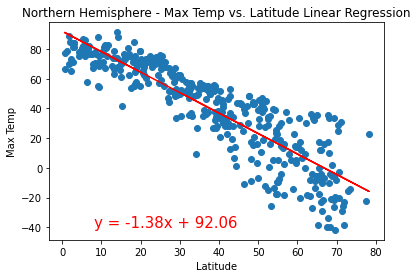

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 
north_temp = north_hemi["Max Temp"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_temp)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8,-40),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_hemi_lat_vs_temp_reg")
plt.show()

In [90]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

south_hemi = cities_data_df.loc[cities_data_df["Lat"]<0]
south_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,East London,-33.0153,27.9116,69.80,88,20,8.05,ZA,1612410923
3,Ushuaia,-54.8000,-68.3000,48.20,87,75,6.91,AR,1612410763
4,Hobart,-42.8794,147.3294,78.01,53,40,8.05,AU,1612410923
5,Lüderitz,-26.6481,15.1594,64.69,70,0,13.65,NA,1612410924
6,Mar del Plata,-38.0023,-57.5575,66.20,77,20,10.36,AR,1612410924
...,...,...,...,...,...,...,...,...,...
574,Japura,-0.3167,102.3500,85.95,58,79,5.70,ID,1612411052
578,Saint-Joseph,-21.3667,55.6167,82.99,61,0,4.61,RE,1612411053
580,Antofagasta,-23.6500,-70.4000,64.40,82,0,1.14,CL,1612411054
581,Ivaiporã,-24.2478,-51.6847,70.18,96,100,0.78,BR,1612410884


The r-value is: 0.45803375264810786


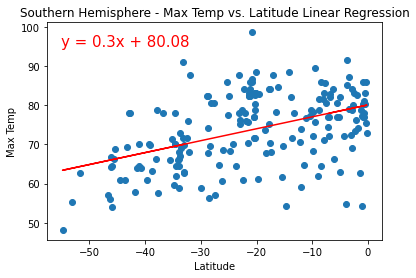

In [101]:
south_temp = south_hemi["Max Temp"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_temp)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_hemi_lat_vs_temp_reg")
plt.show()

The r-value is: 0.3547550539938421


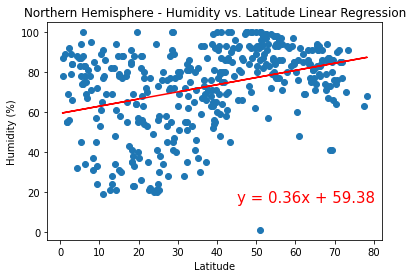

In [105]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

north_hum = north_hemi["Humidity"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_hum)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_hemi_lat_vs_hum_reg")
plt.show()

The r-value is: 0.31246118145515744


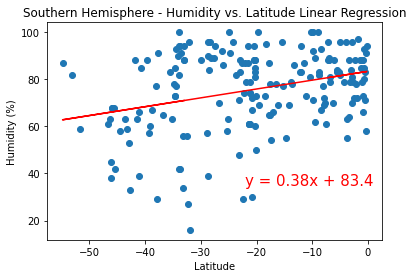

In [109]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

south_hum = south_hemi["Humidity"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_hum)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-22,35),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")


print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_hemi_lat_vs_hum_reg")
plt.show()

The r-value is: 0.3224532355367704


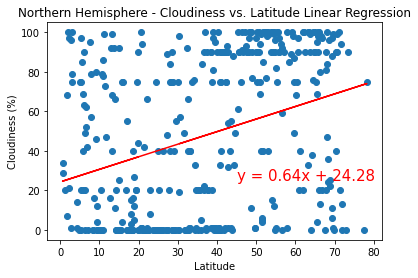

In [111]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

north_cloud = north_hemi["Cloudiness"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_cloud)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_hemi_lat_vs_cloud_reg")
plt.show()

The r-value is: 0.09402491627255692


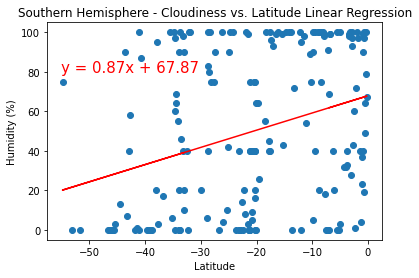

In [128]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


south_cloud = south_hemi["Cloudiness"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_cloud)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")


print(f"The r-value is: {(rvalue)}")

plt.savefig("../Images/south_hemi_lat_vs_cloud_reg")
plt.show()

The r-value is: 0.019437797451423003


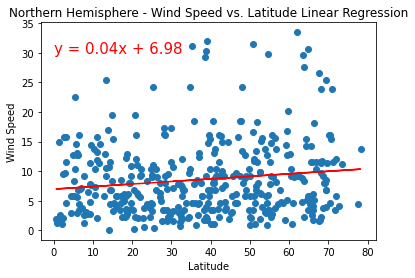

In [127]:
#  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

north_wind = north_hemi["Wind Speed"]
north_lat = north_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept

plt.scatter(north_lat,north_wind)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.plot(north_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

print(f"The r-value is: {(rvalue)}")

plt.savefig("../Images/north_hemi_lat_vs_wind_reg")
plt.show()

The r-value is: -0.27699700572965386


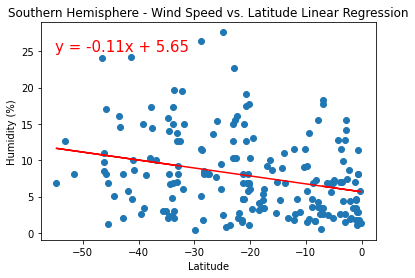

In [129]:
#  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

south_wind = south_hemi["Wind Speed"]
south_lat = south_hemi["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept

plt.scatter(south_lat,south_wind)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.plot(south_lat, regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")


print(f"The r-value is: {(rvalue)}")

plt.savefig("../Images/south_hemi_lat_vs_wind_reg")
plt.show()